# World Happines Analysis

## Content
### 01. Importing libraries and data
### 02. Data cleaning
### 03. Standardizing data
### 04. The elbow technique
### 05. k-means clustering

## 01. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [6]:
# Create Path
path="C:/Users/Oksana Stepanova/OneDrive/Документи/World Happiness/02 Data/Prepared Data/"

In [7]:
# Import data
wh_merged=pd.read_csv(os.path.join(path, 'wh_merged.csv'))

In [8]:
wh_merged.head()

,Unnamed: 0,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,File_Name
0,0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,wh_2015_wrangled.csv
1,1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,wh_2015_wrangled.csv
2,2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,wh_2015_wrangled.csv
3,3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,wh_2015_wrangled.csv
4,4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,wh_2015_wrangled.csv


In [11]:
wh_merged.shape

(1367, 13)

## 02. Data cleaning

In [13]:
# Drop irrelevant columns
wh_merged.drop(columns=['Unnamed: 0', 'File_Name'])

,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),2023,133,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300,0.00000
1363,Zimbabwe,2023,134,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200,0.00000
1364,Sierra Leone,2023,135,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300,0.00000
1365,Lebanon,2023,136,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100,0.00000


In [14]:
# Drop irrelevant columns
wh_merged.drop(columns=['Unnamed: 0', 'File_Name'])

,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),2023,133,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300,0.00000
1363,Zimbabwe,2023,134,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200,0.00000
1364,Sierra Leone,2023,135,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300,0.00000
1365,Lebanon,2023,136,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100,0.00000


In [16]:
wh_merged=wh_merged.drop(columns=['Unnamed: 0', 'File_Name'])

In [17]:
wh_merged.shape

(1367, 11)

In [18]:
# Check for missing values
wh_merged.isnull().sum()

country                        0
year                           0
happiness_rank                 0
happiness_score                0
economy_GDP_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
trust_government_corruption    0
generosity                     0
dystopia_residual              0
dtype: int64

In [19]:
# check for duplicates
dups=wh_merged.duplicated()

In [20]:
dups.shape

(1367,)

In [21]:
wh_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1367 non-null   object 
 1   year                         1367 non-null   int64  
 2   happiness_rank               1367 non-null   int64  
 3   happiness_score              1367 non-null   float64
 4   economy_GDP_per_capita       1367 non-null   float64
 5   family                       1367 non-null   float64
 6   health_life_expectancy       1367 non-null   float64
 7   freedom                      1367 non-null   float64
 8   trust_government_corruption  1367 non-null   float64
 9   generosity                   1367 non-null   float64
 10  dystopia_residual            1367 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 117.6+ KB


In [22]:
# Remove categorical variable fron DataFrame for further clustering
wh_cluster=wh_merged[['happiness_score','economy_GDP_per_capita','family','health_life_expectancy', 'freedom', 
         'trust_government_corruption', 'generosity']]

In [23]:
wh_cluster

,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
1362,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300
1363,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200
1364,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300
1365,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100


## 03. Standardizing data

In [26]:
# Import library
from sklearn.preprocessing import StandardScaler

In [28]:
# Standaze the data
scaler=StandardScaler()
standardized_data=scaler.fit_transform(wh_cluster)
print(standardized_data)

[[ 1.92028011  0.83143832  0.91884465 ...  1.37097904  2.5538297
   0.88751486]
 [ 1.8970139   0.62375944  1.07809952 ...  1.13609863  0.08061437
   2.11937209]
 [ 1.86658886  0.67482476  0.95228455 ...  1.26764442  3.1206619
   1.28138779]
 ...
 [-2.06092632 -0.77043852 -1.52649695 ... -0.50914922 -0.72311619
  -0.0287849 ]
 [-2.72848757  0.87661657 -1.71982608 ... -2.09203889 -0.93637803
  -1.19424615]
 [-3.20544487 -0.82556085 -3.15771147 ... -2.8771011  -0.65202891
  -0.91171009]]


In [29]:
# Convert the data into dataframe
wh_cluster=pd.DataFrame(standardized_data, columns=wh_cluster.columns)
print(wh_cluster)

      happiness_score  economy_GDP_per_capita    family  \
0            1.920280                0.831438  0.918845   
1            1.897014                0.623759  1.078100   
2            1.866589                0.674825  0.952285   
3            1.862115                0.969222  0.862779   
4            1.777103                0.676611  0.837586   
...               ...                     ...       ...   
1362        -1.999181               -1.076919 -0.789430   
1363        -2.001866               -0.576408 -0.496415   
1364        -2.060926               -0.770439 -1.526497   
1365        -2.728488                0.876617 -1.719826   
1366        -3.205445               -0.825561 -3.157711   

      health_life_expectancy   freedom  trust_government_corruption  \
0                   1.459105  1.370979                     2.553830   
1                   1.485275  1.136099                     0.080614   
2                   1.186424  1.267644                     3.120662   
3      

## 04. The elbow technique

In [31]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [32]:
score = [kmeans[i].fit(wh_cluster).score(wh_cluster) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

[-9568.999999999998,
 -6433.543565557886,
 -5077.200607870966,
 -4559.815623936891,
 -4135.50909153279,
 -3857.808647183758,
 -3623.477831114958,
 -3445.7932128558955,
 -3293.4272290925574]

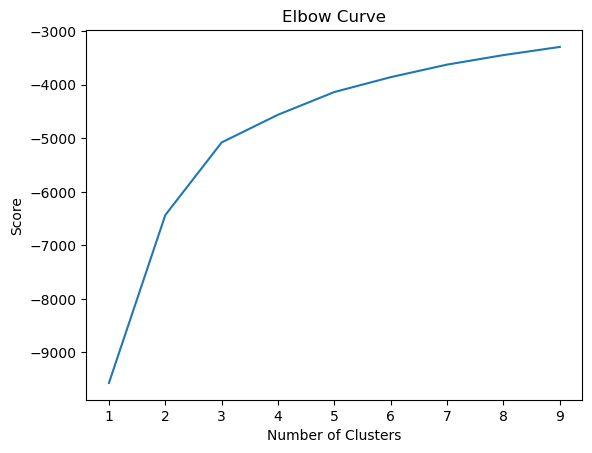

In [33]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The line tends to flatten out on the x-axis after 3. Therefore, the optimal count for clusters is three.

## 05. k-means clustering

In [36]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [37]:
# Fit the k-means object to the data
kmeans.fit(wh_cluster)

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [38]:
wh_cluster['clusters'] = kmeans.fit_predict(wh_cluster)

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [39]:
wh_cluster.head()

,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,clusters
0,1.920280,0.831438,0.918845,1.459105,1.370979,2.553830,0.887515,0
1,1.897014,0.623759,1.078100,1.485275,1.136099,0.080614,2.119372,0
2,1.866589,0.674825,0.952285,1.186424,1.267644,3.120662,1.281388,0
3,1.862115,0.969222,0.862779,1.229577,1.397531,2.067326,1.330832,0
4,1.777103,0.676611,0.837586,1.312945,1.162906,1.752232,2.311938,0


In [40]:
wh_cluster['clusters'].value_counts()

clusters
2    709
1    437
0    221
Name: count, dtype: int64

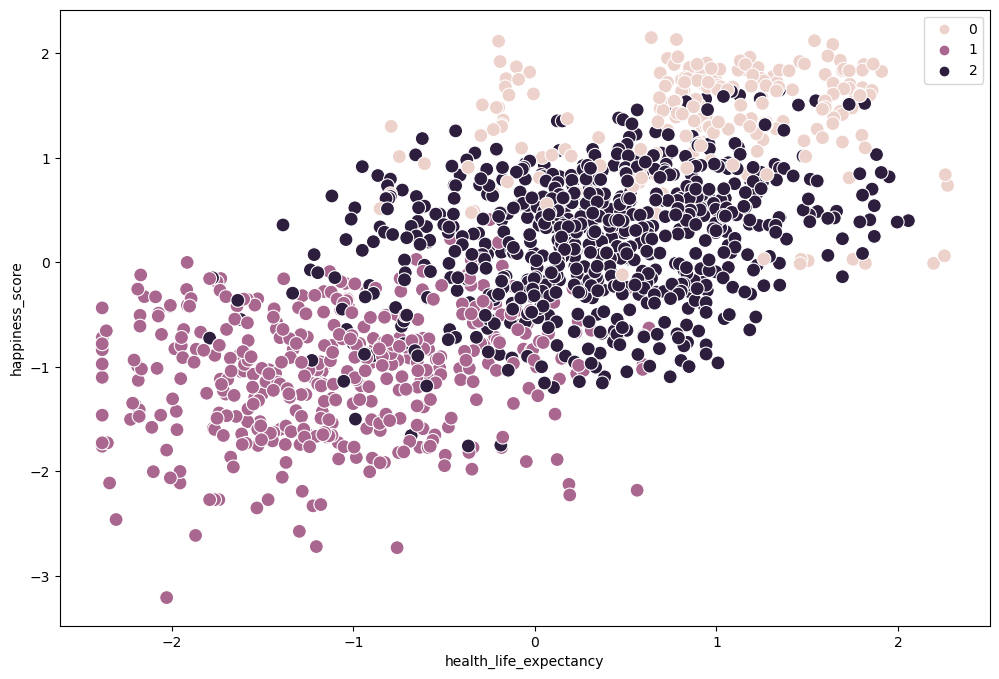

In [41]:
# Plot the clusters for the "happiness_score" and "health_life_expectancy" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wh_cluster['health_life_expectancy'], y=wh_cluster['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('health_life_expectancy') # Label x-axis.
plt.ylabel('happiness_score') # Label y-axis.
plt.show()

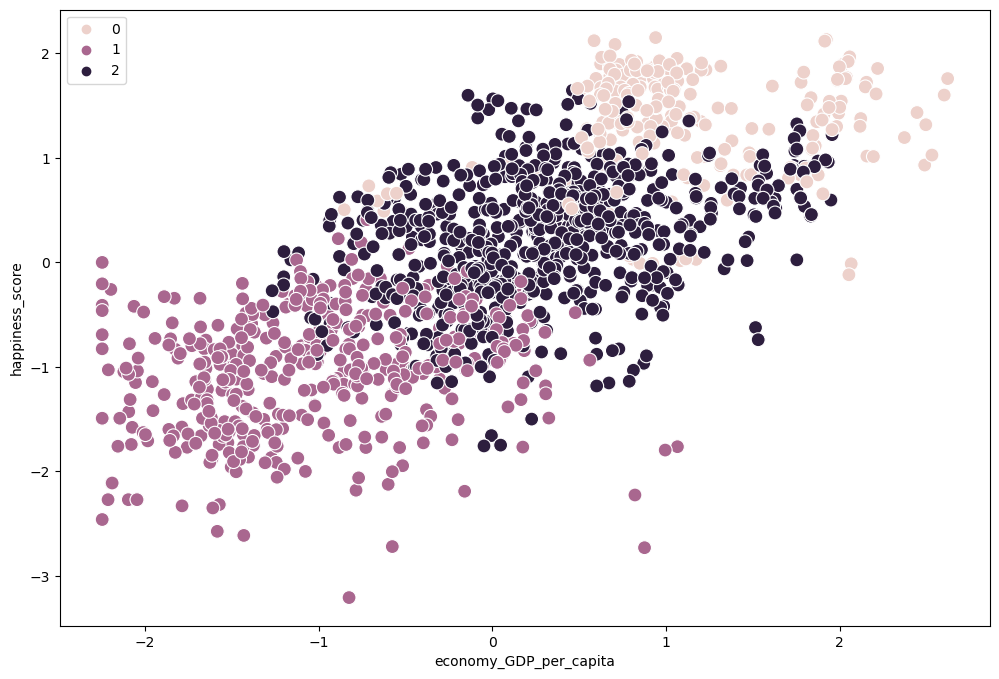

In [42]:
# Plot the clusters for the "happiness_score" and "economy_GDP_per_capita" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wh_cluster['economy_GDP_per_capita'], y=wh_cluster['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('economy_GDP_per_capita') # Label x-axis.
plt.ylabel('happiness_score') # Label y-axis.
plt.show()

#### Both graphs show the same pattern between variables health life expectancy and happiness score and between GDP per capita and happiness score. Both charts display a positive correlation with the happiness score. As long GDP per capita rises, the happiness score tends to increase as well. 

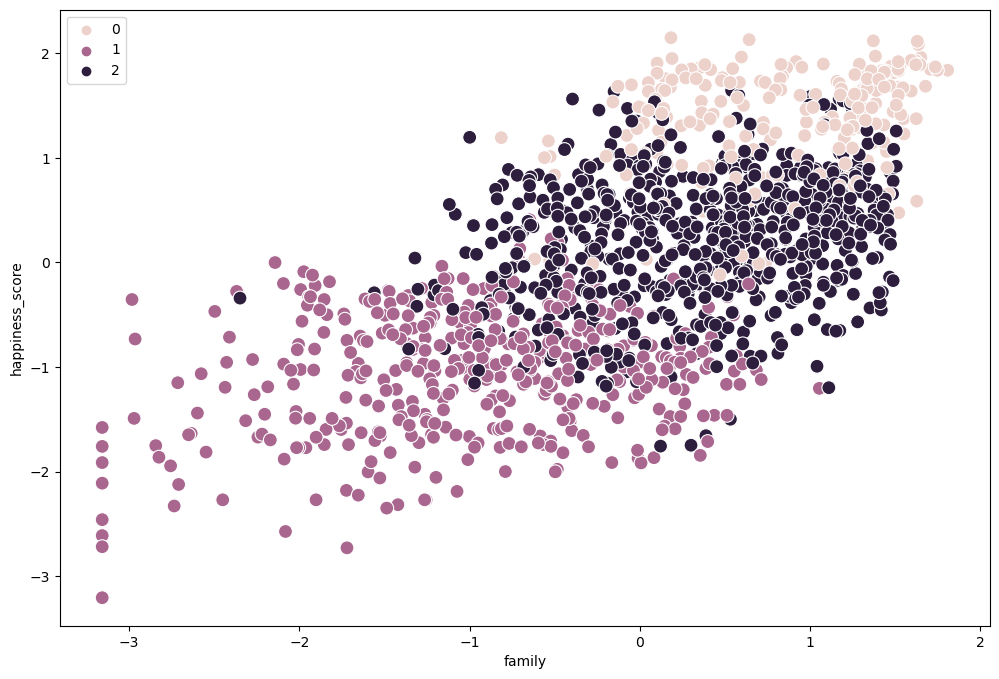

In [44]:
# Plot the clusters for the "happiness_score" and "family" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wh_cluster['family'], y=wh_cluster['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('family') # Label x-axis.
plt.ylabel('happiness_score') # Label y-axis.
plt.show()

#### The positive correlation between family relationships and happiness score is observed.  

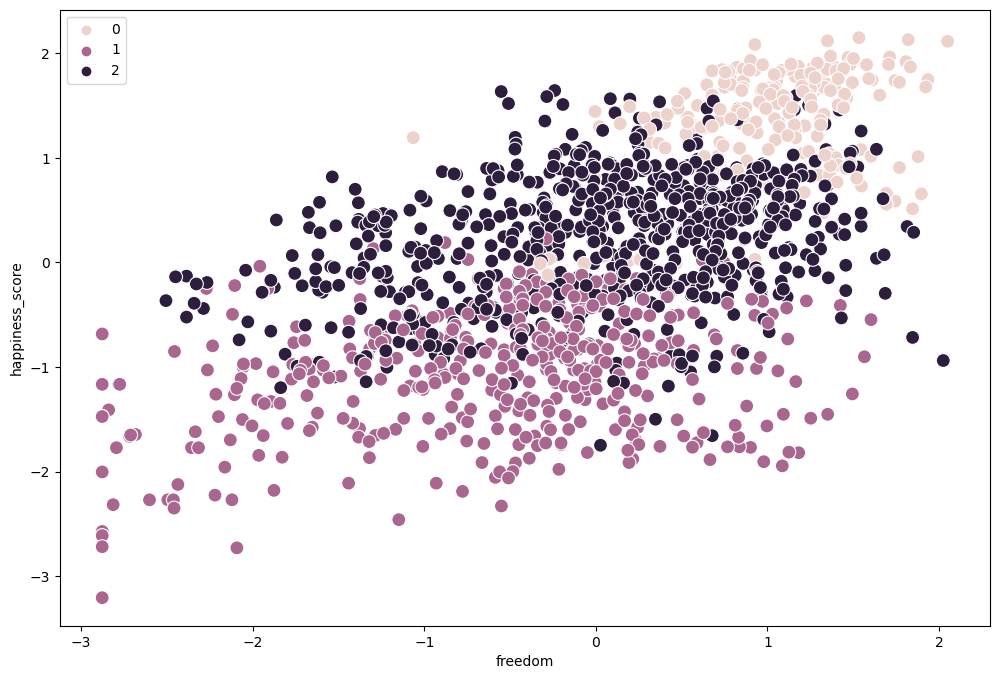

In [46]:
# Plot the clusters for the "happiness_score" and "freedom" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wh_cluster['freedom'], y=wh_cluster['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('freedom') # Label x-axis.
plt.ylabel('happiness_score') # Label y-axis.
plt.show()

#### The general trend to positive correlation between the freedom and happiness score is evident. However, this tendency is more visible for the pink cluster, the higher the freedom index, the higher the happiness score. For two other clusters the data points tend to spread along the x-axis.

In [49]:
wh_cluster.loc[wh_cluster['clusters'] == 2, 'cluster'] = 'dark purple'
wh_cluster.loc[wh_cluster['clusters'] == 1, 'cluster'] = 'purple'
wh_cluster.loc[wh_cluster['clusters'] == 0, 'cluster'] = 'pink'

In [50]:
wh_cluster.groupby('cluster').agg({'happiness_score':['mean', 'median'], 
                         'economy_GDP_per_capita':['mean', 'median'], 
                         'family':['mean', 'median'],
                          'health_life_expectancy':['mean', 'median'],
                          'freedom':['mean', 'median'],
                          'trust_government_corruption':['mean', 'median'],
                          'generosity':['mean', 'median']})

happiness_score           economy_GDP_per_capita            \
                       mean    median                   mean    median   
cluster                                                                  
dark purple        0.220414  0.288066               0.287374  0.240353   
pink               1.360445  1.452271               1.114716  0.979763   
purple            -1.045611 -0.985312              -1.029978 -1.068099   

               family           health_life_expectancy             freedom  \
                 mean    median                   mean    median      mean   
cluster                                                                      
dark purple  0.338989  0.403774               0.361326  0.366869  0.042750   
pink         0.827940  0.891416               0.923347  0.947016  1.015715   
purple      -0.968690 -0.901198              -1.053179 -1.081662 -0.583026   

                      trust_government_corruption           generosity  \
               median                        mean    median       mean   
cluster                                                                  
dark purple  0.161026                   -0.398927 -0.507988  -0.370084   
pink         1.053508                    1.661967  1.635826   0.770147   
purple      -0.438764                   -0.193262 -0.349908   0.210954   

                       
               median  
cluster                
dark purple -0.549711  
pink         0.659897  
purple       0.065070

#### The graphs show that there is a positive correlation between happiness score and other variables. 
#### The pink cluster returns the best stats. The median value of all variables is the highest and significantly larger than the other clusters. These data points are related to the countries with the highest happiness score. 
#### Clusters:
#### The pink (cluster 0) is composed of countries having high level of happiness score, as well as high GDP, life expectancy level, high perception of freedom, trust and generosity.
#### The dark purple (cluster 2) represents the countries having middle happiness score, middle GDP & life expectancy level as well as middle level of freedom. However, the mean and median values of the trust index and generosity perception are the lowest for cluster.
#### The purple (cluster 1) is composed of countries having low happiness score and low GDP & life expectancy level as well as low perception of freedom.
#### This analysis has given more insights into the need to explore further every cluster to discover how people perceive happiness by country. 

#### Additionally, I will create charts displaying the relationship between happiness score and two other indexes: trust to government and generosity. 

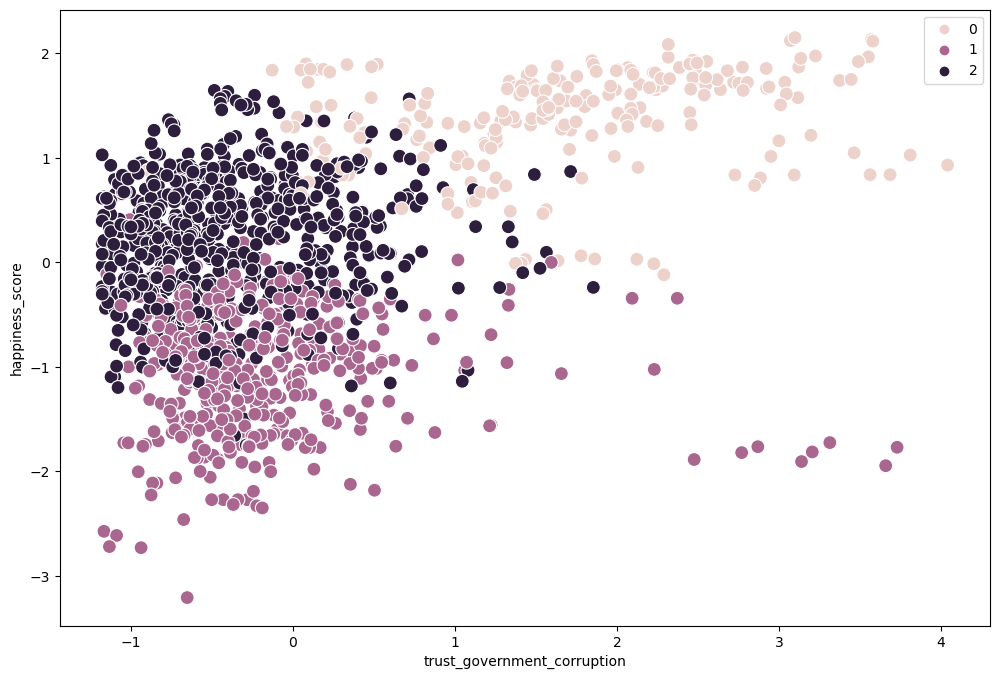

In [51]:
# Plot the clusters for the "happiness_score" and "trust_government_corruption" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wh_cluster['trust_government_corruption'], y=wh_cluster['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('trust_government_corruption') # Label x-axis.
plt.ylabel('happiness_score') # Label y-axis.
plt.show()

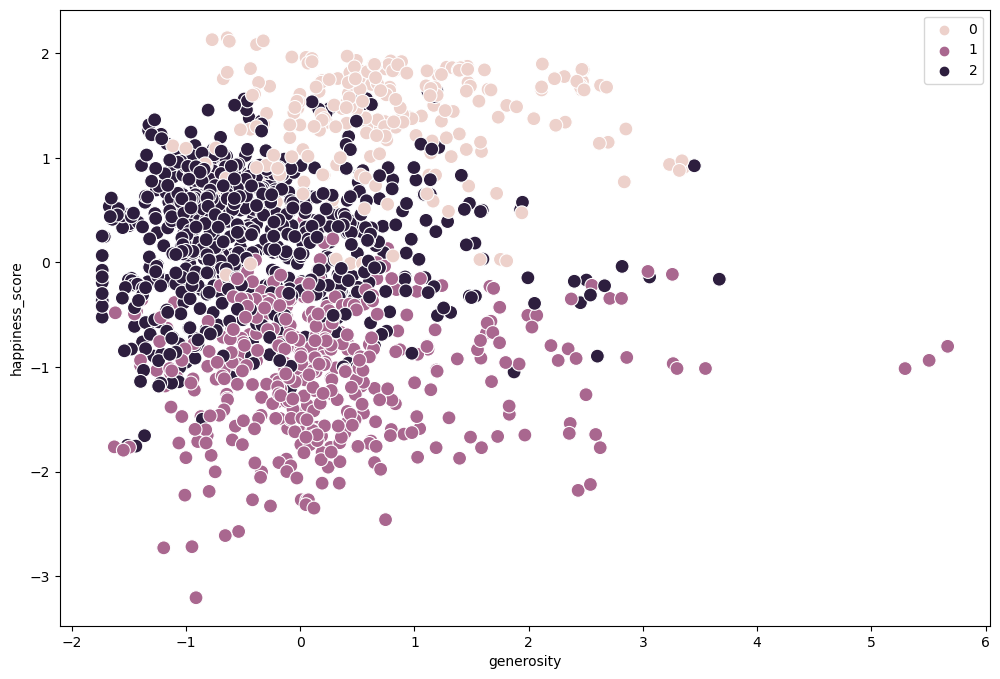

In [52]:
# Plot the clusters for the "happiness_score" and "generosity" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wh_cluster['generosity'], y=wh_cluster['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('generosity') # Label x-axis.
plt.ylabel('happiness_score') # Label y-axis.
plt.show()

#### The plotted charts show there is no strong correlation between the happiness and given variable. The data point significantly pulled out in the left side of the graphs with the low level of trust and generosity. The data of the dark purple cluster overlap the purple cluster. The impact of these two variables is week on the happiness score.